In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [157]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/True.csv')

In [158]:
df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [159]:
df.shape

(21417, 4)

In [160]:
df.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [162]:
df = df.drop(['date'] , axis = 1)

In [163]:
df['title'] = df['title'].str.lower()
df['text'] = df['text'].str.lower()
df['subject'] = df['subject'].str.lower()

In [164]:
df.head()

,title,text,subject
0,"as u.s. budget fight looms, republicans flip t...",washington (reuters) - the head of a conservat...,politicsnews
1,u.s. military to accept transgender recruits o...,washington (reuters) - transgender people will...,politicsnews
2,senior u.s. republican senator: 'let mr. muell...,washington (reuters) - the special counsel inv...,politicsnews
3,fbi russia probe helped by australian diplomat...,washington (reuters) - trump campaign adviser ...,politicsnews
4,trump wants postal service to charge 'much mor...,seattle/washington (reuters) - president donal...,politicsnews


In [165]:
#def remove_html_tags(text) :
 # pattern = re.compile('<.*?>')
  #return pattern.sub(r'', text)

#def remove_url(text) :
 # pattern = re.compile(r'https://\S+|www\.\S+')
  #return pattern.sub(r'', text)

In [166]:
#df['title'] = remove_html_tags(str(df['title']))
#df['text'] = remove_html_tags(str(df['text']))

#df['title'] = remove_url(str(df['title']))
#df['text'] = remove_url(str(df['text']))

In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer , TfidfTransformer

x = df['text']
y = df['subject']


<Axes: xlabel='count', ylabel='subject'>

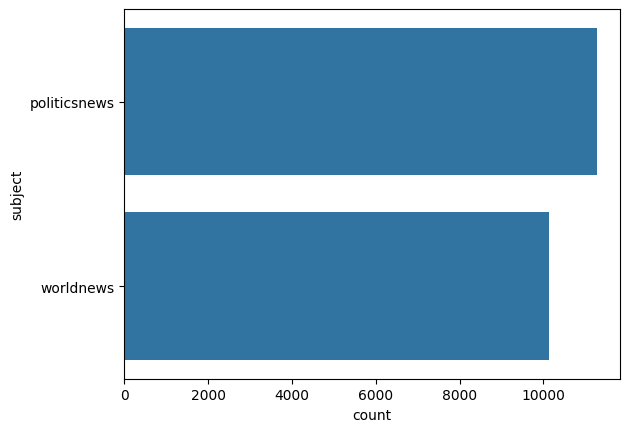

In [179]:
sns.countplot(y)

In [187]:
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/Fake.csv')
df1['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [168]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

# Tokenize sentences in the 'text' column
df['title'] = df['title'].apply(lambda x: word_tokenize(x))

# Display the DataFrame with tokenized sentences
print("Tokenized Sentences:")
print(df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tokenized Sentences:
                                                   title  \
0      [as, u.s., budget, fight, looms, ,, republican...   
1      [u.s., military, to, accept, transgender, recr...   
2      [senior, u.s., republican, senator, :, 'let, m...   
3      [fbi, russia, probe, helped, by, australian, d...   
4      [trump, wants, postal, service, to, charge, 'm...   
...                                                  ...   
21412  ['fully, committed, ', nato, backs, new, u.s.,...   
21413  [lexisnexis, withdrew, two, products, from, ch...   
21414  [minsk, cultural, hub, becomes, haven, from, a...   
21415  [vatican, upbeat, on, possibility, of, pope, f...   
21416  [indonesia, to, buy, $, 1.14, billion, worth, ...   

                                                    text       subject  
0      washington (reuters) - the head of a conservat...  politicsnews  
1      washington (reuters) - transgender people will...  politicsnews  
2      washington (reuters) - the speci

In [169]:
from textblob import TextBlob
textblb = TextBlob(df1)
textblb.correct().string

"                                                   title  \\\n0      as u.s. budget fight looks, republicans lip t...   \n1      u.s. military to accept transgender recruits o...   \n2      senior u.s. republican senator: 'let mr. quell...   \n3      foi russia probe helped by australian diplomat...   \n4      tramp wants postal service to charge 'much for...   \n...                                                  ...   \n21412  'fully committed' naso backs new u.s. approach...   \n21413  lexisnexis withdrew two products from chinese ...   \n21414  mind cultural hut becomes haven from authorities   \n21415  vatican beat on possibility of pope francis ...   \n21416  indonesia to buy $1.14 billion worth of russia...   \n\n                                                    text       subject  \n0      washington (renters) - the head of a conserve...  politicsnews  \n1      washington (renters) - transgender people will...  politicsnews  \n2      washington (renters) - the special couns